# 1. Imports

In [106]:
import pickle
import csv
import pandas as pd
import os
import cv2
import numpy as np
from tqdm import tqdm
import PIL as pil
import matplotlib.pyplot as plt
import random

## Data Analysis

In [122]:
train_datacsv = pd.read_csv('C:\\Users\\ASUS\\Desktop\\utilizador\\Desktop\\Universidade\\MCD\\1ºAno\\1ºSemestre\\FAA\\archive\\train.csv')
test_datacsv = pd.read_csv('C:\\Users\\ASUS\\Desktop\\utilizador\\Desktop\\Universidade\\MCD\\1ºAno\\1ºSemestre\\FAA\\archive\\test.csv')
print(type(train_datacsv))

<class 'pandas.core.frame.DataFrame'>


In [121]:
train_datacsv.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [123]:
test_datacsv.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

### Processamento imagens de treino

In [125]:
# Caminho da pasta principal do dataset
base_path = "C:\\Users\\ASUS\\Desktop\\utilizador\\Desktop\\Universidade\\MCD\\1ºAno\\1ºSemestre\\FAA\\archive"

# Listas para armazenar imagens e labels
images = []
labels = []


    
# Percorre as linhas do CSV
for _, row in train_datacsv.iterrows():
    img_path = os.path.join(base_path, row['Path'])
    img_path = img_path.replace('/', os.sep) 
    
    # Lê a imagem
    img = pil.Image.open(img_path)
    img = np.array(img)
    if img is None:
        continue
    
    # Recorta o ROI (sinal de trânsito)
    roi = img[row['Roi.Y1']:row['Roi.Y2'], row['Roi.X1']:row['Roi.X2']]
    
    # Redimensiona para 32x32
    roi_resized = cv2.resize(roi, (32, 32))
    
    # Normaliza (0–1)
    roi_resized = roi_resized / 255.0
    
    # Guarda a imagem e o rótulo
    images.append(roi_resized)
    labels.append(row['ClassId'])

# Converte para arrays NumPy
X = np.array(images, dtype=np.float32)
y = np.array(labels)

print("Shape das imagens:", X.shape)
print("Shape dos labels:", y.shape)
print("Número de classes:", len(np.unique(y)))

Shape das imagens: (39209, 32, 32, 3)
Shape dos labels: (39209,)
Número de classes: 43


In [124]:
# Caminho da pasta principal do dataset
base_path = "C:\\Users\\ASUS\\Desktop\\utilizador\\Desktop\\Universidade\\MCD\\1ºAno\\1ºSemestre\\FAA\\archive"

# Listas para armazenar imagens e labels
images = []
labels = []


    
# Percorre as linhas do CSV
for _, row in test_datacsv.iterrows():
    img_path = os.path.join(base_path, row['Path'])
    img_path = img_path.replace('/', os.sep) 
    
    # Lê a imagem
    img = pil.Image.open(img_path)
    img = np.array(img)
    if img is None:
        continue
    
    # Recorta o ROI (sinal de trânsito)
    roi = img[row['Roi.Y1']:row['Roi.Y2'], row['Roi.X1']:row['Roi.X2']]
    
    # Redimensiona para 32x32
    roi_resized = cv2.resize(roi, (32, 32))
    
    # Normaliza (0–1)
    roi_resized = roi_resized / 255.0
    
    # Guarda a imagem e o rótulo
    images.append(roi_resized)
    labels.append(row['ClassId'])

# Converte para arrays NumPy
X_test = np.array(images, dtype=np.float32)
y_test = np.array(labels)

print("Shape das imagens:", X_test.shape)
print("Shape dos labels:", y_test.shape)
print("Número de classes:", len(np.unique(y_test)))

Shape das imagens: (12630, 32, 32, 3)
Shape dos labels: (12630,)
Número de classes: 43


### Shuffle

In [126]:
shuffle_index = np.random.permutation(len(X))
X = X[shuffle_index]
y = y[shuffle_index]

### Train, Cross Val and Test Partitions

In [127]:
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]
X_val = X[int(len(X)*0.8):int(len(X))]
y_val = y[int(len(y)*0.8):int(len(y))]


# Save npArrays

In [144]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)

# Import npArrays

In [96]:
X_train = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\train\X_train.npy")
y_train = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\train\y_train.npy")
X_test = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\test\X_test.npy")
y_test = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\test\y_test.npy")
X_val = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\val\X_val.npy")
y_val = np.load(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\arrays\val\y_val.npy")

### Shape

In [128]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (31367, 32, 32, 3)
X_val shape: (7842, 32, 32, 3)
X_test shape: (12630, 32, 32, 3)


In [129]:
set_y_train = set(y_train)
set_y_val = set(y_val)
set_y_test = set(y_test)

In [130]:
print(set_y_train)
print(set_y_val)
print(set_y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


In [131]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


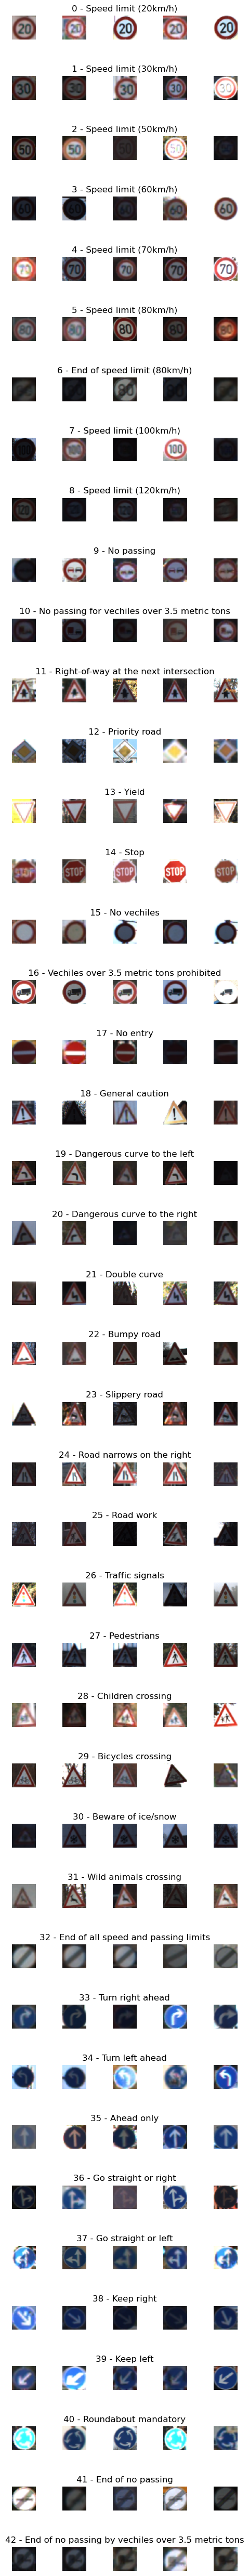

In [132]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\utilizador\Desktop\Universidade\MCD\1ºAno\1ºSemestre\FAA\Project1\signames.csv")

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      num_of_samples.append(len(x_selected))

[176, 1766, 1778, 1110, 1604, 1492, 353, 1158, 1112, 1173, 1627, 1054, 1702, 1746, 615, 508, 339, 884, 966, 168, 285, 263, 326, 417, 214, 1186, 468, 190, 427, 213, 369, 622, 185, 547, 341, 958, 311, 163, 1650, 234, 293, 195, 179]


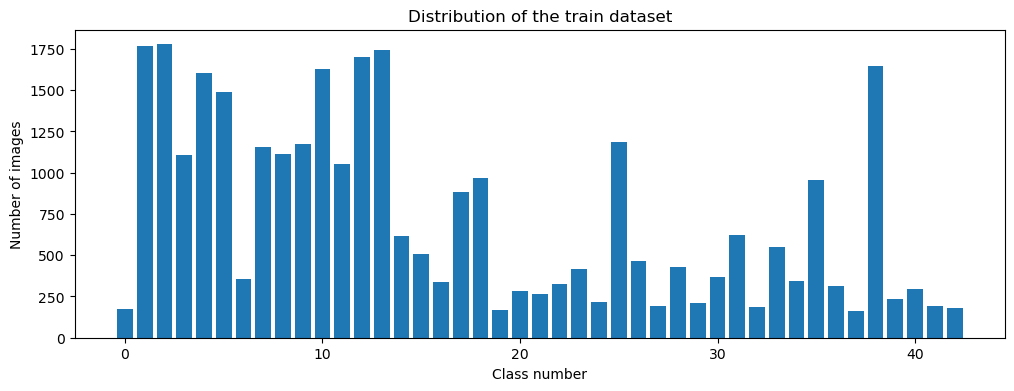

In [133]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
18


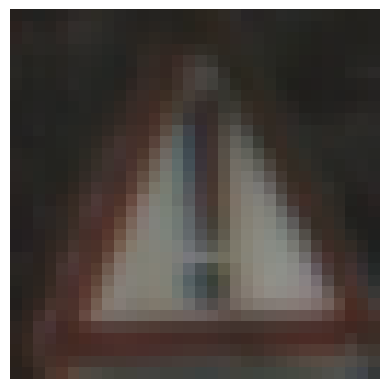

In [135]:
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [157]:
X_train.dtype

dtype('float32')

### Nota:

Antes de enviar a imagem para a função cv2.cvtColor, foi necessário modificar o tipo de dados de float32 para uint8, porque a função equalizeHist() não aceita dados do tipo float32

A função equalizeHist() redistribui os níveis de cinzento de modo a usar melhor toda a faixa de 0–255.
Em termos simples:

Se a imagem estava escura (muitos pixels próximos de 0), ela clareia;

Se estava muito clara, aumenta o contraste nas zonas mais “planas”;

No fim, o histograma fica mais uniforme (distribuído).

Visualmente, isto melhora contraste e definição, especialmente em imagens com iluminação desigual.

In [194]:
img = X_train[1000]
img = (img * 255).astype(np.uint8)

In [191]:
img.dtype

dtype('uint8')

(32, 32)


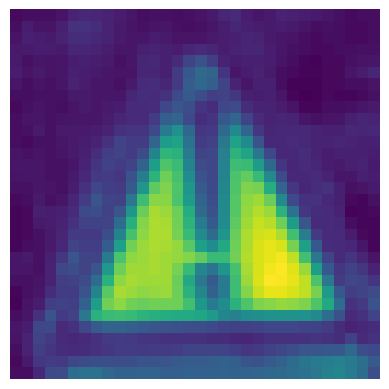

In [ ]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


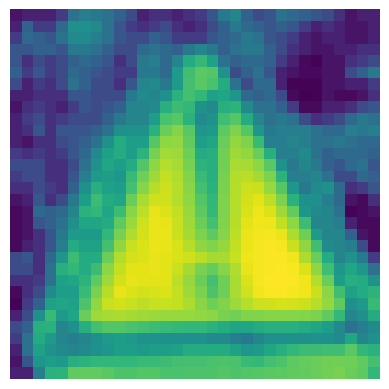

In [193]:
img = cv2.equalizeHist((img * 255).astype(np.uint8))/255
plt.imshow(img)
plt.axis("off")
print(img.shape)

## Reshaping

In [ ]:
X_train_gray = np.array([
    cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_RGB2GRAY) / 255.0
    for img in X_train
])


print(X_train_gray.shape)
print(X_train_gray.dtype)

X_train_grayeq = np.array([
    cv2.equalizeHist((img * 255).astype('uint8')) / 255.0
    for img in X_train_gray
])

(31367, 32, 32)
float64


In [181]:
X_val_gray = np.array([
    cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_RGB2GRAY) / 255.0
    for img in X_val
])


print(X_val_gray.shape)
print(X_val_gray.dtype)

X_val_grayeq = np.array([
    cv2.equalizeHist((img * 255).astype('uint8')) / 255.0
    for img in X_val_gray
])

(7842, 32, 32)
float64


In [180]:
X_test_gray = np.array([
    cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_RGB2GRAY) / 255.0
    for img in X_test
])


print(X_test_gray.shape)
print(X_test_gray.dtype)

X_test_grayeq = np.array([
    cv2.equalizeHist((img * 255).astype('uint8')) / 255.0
    for img in X_test_gray
])

(12630, 32, 32)
float64


In [182]:
X_trainv2 = X_train_grayeq.reshape(len(X_train_grayeq), 32, 32, 1)
X_valv2 = X_val_grayeq.reshape(len(X_val_grayeq), 32, 32, 1)
X_testv2 = X_test_grayeq.reshape(len(X_test_grayeq), 32, 32, 1)

## Gen Images before taking off
- To get a balanced dataset

## Gen Images on the fly
- To get the model more robust
- It's not to add onto the dataset

# Build the Model